In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df = pd.read_csv('data.csv')

df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
df.shape

(318438, 18)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  object 
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  object 
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  object 
 6   Ward_Type                          318438 non-null  object 
 7   Ward_Facility_Code                 318438 non-null  object 
 8   Bed Grade                          318325 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [15]:
df.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [ ]:
#Drop some unneccessary columns
df.drop(['patientid'], axis=1, inplace=True)

In [44]:
df.drop(['case_id'], axis=1, inplace=True)

In [45]:
#checking for Null values
df.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

**Replace Null values**

In [31]:
def imputer_Bed_Grade(x):
    if pd.isnull(x):
        return 0
    else:
        return x
    
def imputer_City_Code_Patient(x):
    if pd.isnull(x):
        return 0
    else:
        return x

In [32]:
df['Bed Grade'] = df['Bed Grade'].apply(imputer_Bed_Grade)
df['City_Code_Patient'] = df['City_Code_Patient'].apply(imputer_City_Code_Patient)

Dividing the columns into categorical and numerical for EDA

In [46]:
cat_cols=[]
num_cols=[]

for col in df.columns:
    if df[col].dtypes=='object':
        cat_cols.append(col)
        
for col in df.columns:
    if df[col].dtypes!='object':
        num_cols.append(col)
        
print(cat_cols)
print(num_cols)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']
['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']


**Exploratory Data Analysis**

C:\Users\Phillips Oki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Phillips Oki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Phillips Oki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\P

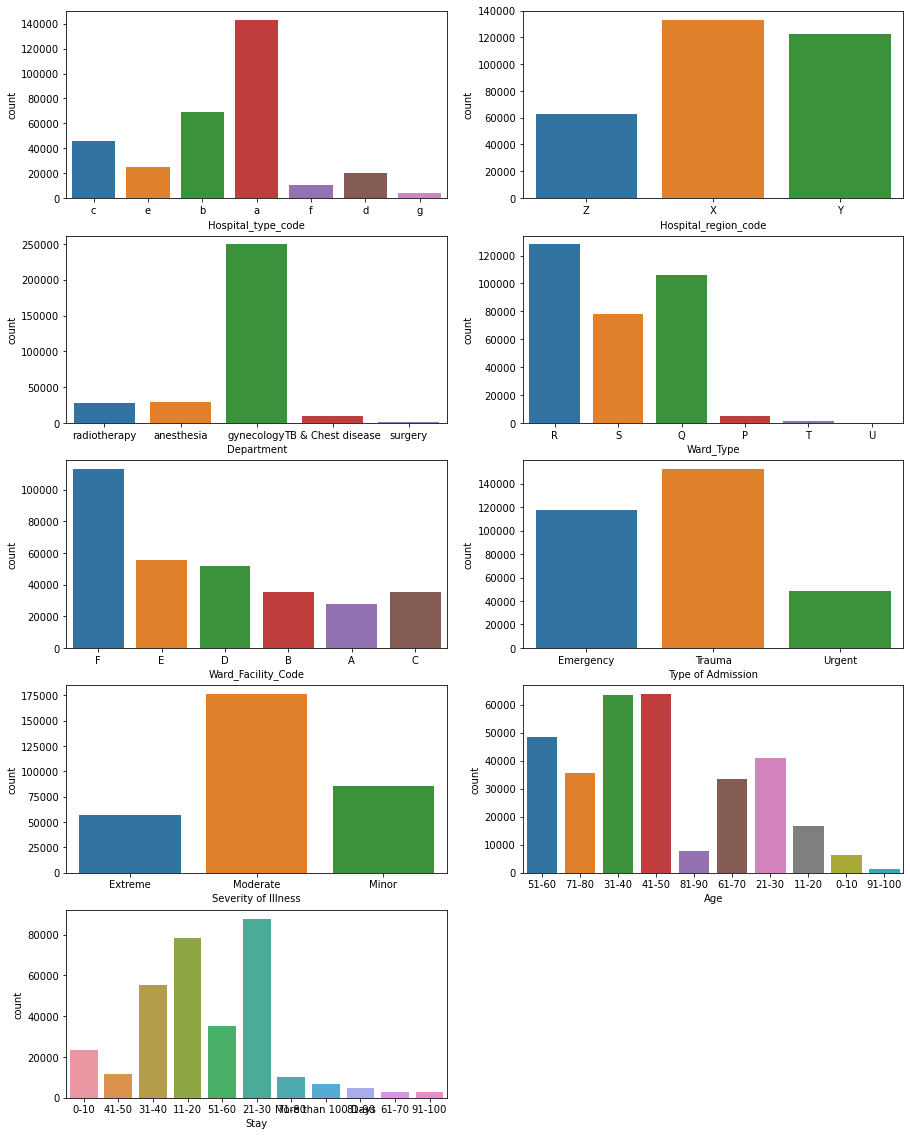

In [47]:
i=1
plt.figure(figsize=(15,20))
for col in cat_cols:
    plt.subplot(5,2,i)
    sns.countplot(df[col])
    i=i+1
plt.show()

In [48]:
df['Stay'].replace('More than 100 Days', '>100', inplace=True)

**Dividing the Labels**

Given the data mining goal, which is to identify patients with high length of stay risk, it made sense to do some labelled encoding for stay 0: 0-30 days 1: 31-100+ days.
According to NHS England (2022), long stays are from 21 days or more, but to have a balanced number of patients in each category, I extended it to 30 days or more. Plus, the model will not give good prediction accuracy if there are 11 classes to predict.

In [51]:
df['Stay']= df['Stay'].replace({'0-10':0, 
                                      '11-20':0, 
                                      '21-30':0, 
                                      '31-40':1, 
                                      '41-50':1, 
                                      '51-60':1,
                                      '61-70':1,
                                      '71-80':1,
                                      '81-90':1,
                                      '91-100':1,
                                      '>100':1})

In [52]:
df['Stay'].value_counts()

0    189234
1    129204
Name: Stay, dtype: int64

In [53]:
df['Age']= df['Age'].replace({'0-10':0, 
                                      '11-20':1, 
                                      '21-30':2, 
                                      '31-40':3, 
                                      '41-50':4, 
                                      '51-60':5,
                                      '61-70':6,
                                      '71-80':7,
                                      '81-90':8,
                                      '91-100':9})

In [54]:
df['Age'].value_counts()

4    63749
3    63639
5    48514
2    40843
7    35792
6    33687
1    16768
8     7890
0     6254
9     1302
Name: Age, dtype: int64

In [55]:
ill = df['Severity of Illness'].value_counts(ascending = False).index

In [56]:
map_ill = {k: i+1 for i, k in enumerate(ill)}

map_ill

{'Moderate': 1, 'Minor': 2, 'Extreme': 3}

In [57]:
map_add = {'Emergency' : 3, 'Urgent' : 2, 'Trauma' : 1}

In [58]:
df['Severity of Illness'] = df['Severity of Illness'].map(map_ill)
df['Type of Admission'] = df['Type of Admission'].map(map_add)

In [59]:
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,3,3,2,5,4911.0,0
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,1,3,2,5,5954.0,1
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,1,3,2,5,4745.0,1
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,1,3,2,5,7272.0,1
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,1,3,2,5,5558.0,1


In [60]:
df['Department'].unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [62]:
df['Department']= df['Department'].replace({'radiotherapy':0, 
                                            'anesthesia':1, 
                                            'gynecology':2, 
                                            'TB & Chest disease':3,
                                            'surgery':4})

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3 = df.copy()
df3.select_dtypes(include=['object']).columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Ward_Type',
       'Ward_Facility_Code'],
      dtype='object')

In [64]:
df3['Hospital_type_code'] = le.fit_transform(df3['Hospital_type_code'])
df3['Hospital_region_code'] = le.fit_transform(df3['Hospital_region_code'])
df3['Ward_Type'] = le.fit_transform(df3['Ward_Type'])
df3['Ward_Facility_Code'] = le.fit_transform(df3['Ward_Facility_Code'])

In [66]:
df3.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,2,3,2,3,0,2,5,2.0,7.0,3,3,2,5,4911.0,0
1,2,2,5,2,2,0,3,5,2.0,7.0,1,3,2,5,5954.0,1
2,10,4,1,0,2,1,3,4,2.0,7.0,1,3,2,5,4745.0,1
3,26,1,2,1,2,0,2,3,2.0,7.0,1,3,2,5,7272.0,1
4,26,1,2,1,2,0,3,3,2.0,7.0,1,3,2,5,5558.0,1


**Association Analysis**

<AxesSubplot:>

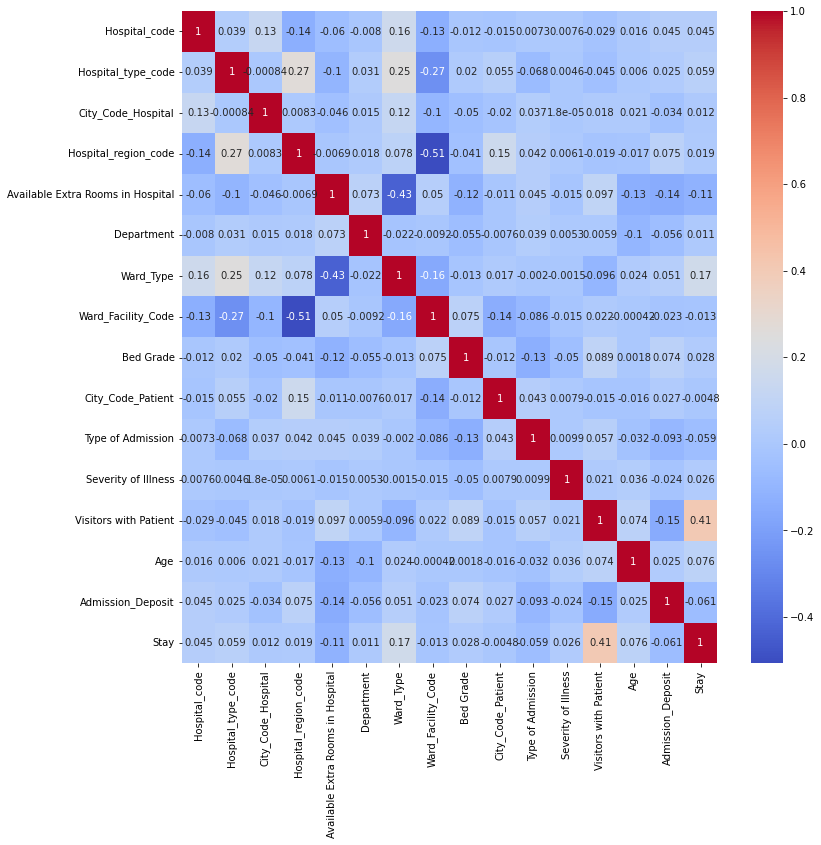

In [68]:
plt.figure(figsize=(12,12))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')

In [69]:
from sklearn.model_selection import train_test_split

y= df3['Stay']
X= df3.drop('Stay', axis=1)

In [75]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.2, stratify=y, random_state=42)

**Building Models**

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

C:\Users\Phillips Oki\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
value= [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), XGBClassifier()]

key= ['LogisticRegression', 'RandomForsetClassifier', 'DecisionTreeClassifier',  'XGBClassifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy)

C:\Users\Phillips Oki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
0.7659684712975757
RandomForsetClassifier
0.7820782565004396
DecisionTreeClassifier
0.6994096219067957


C:\Users\Phillips Oki\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Phillips Oki\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:34:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
0.7957857053134029


<AxesSubplot:>

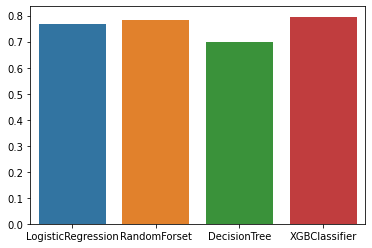

In [88]:
sns.barplot(x= ['LogisticRegression', 'RandomForset', 'DecisionTree', 'XGBClassifier'],y=accuracy_scores)